In [1]:
from IPython import get_ipython

if get_ipython():
    get_ipython().run_line_magic("load_ext", "autoreload")
    get_ipython().run_line_magic("autoreload", "2")

In [2]:
import latenta as la
import laflow as laf

import numpy as np

In [3]:
import tempfile

tmpdir = tempfile.TemporaryDirectory().name

model = laf.Model("model", project_root=tmpdir)

In [4]:
cells = la.Dim(3, "cell")
genes = la.Dim(4, "gene")

dataset = laf.Dataset("dataset", project_root=tmpdir)
dataset.add_modality(
    laf.dataset.MatrixModality(
        "transcriptome",
        dataset,
        X=np.random.random(size=(cells.size, genes.size)),
        obs=cells.index.to_frame().set_index("cell"),
        var=genes.index.to_frame().set_index("gene"),
        reset=True,
    )
)

In [5]:
model = laf.Model(dataset=dataset, name="", project_root=tmpdir)

In [6]:
model.root_initial = la.Latent(
    p=la.distributions.Normal(la.Parameter(1.0)),
    q=la.distributions.Normal(-1.0, definition=[cells, genes]),
    label="latent",
)

In [7]:
model.root_initial.plot()

In [8]:
dataset.test = model.root_

In [9]:
dataset.test_

In [10]:
model

In [11]:
model.infer()

▶️ | create_scheme                                                                                       


✅ | create_scheme                                                                                       


▶️ | infer                                                                                               


  0%|                                                                                                         …

  0%|                                                                                                         …

✅ | infer                                                                                               


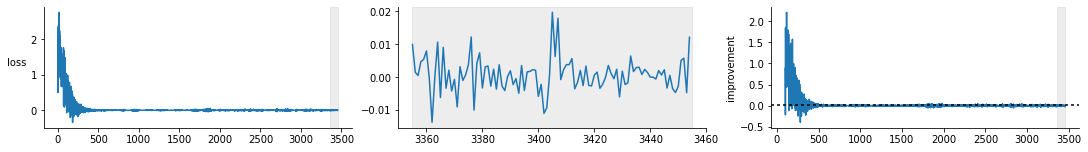

In [12]:
model.trace.plot()

In [13]:
posterior = la.posterior.scalar.ScalarObserved(model.root.q)
posterior.sample(1)

  0%|          | 0/1 [00:00<?, ?it/s]

As explained in [], {class}`laflow.Latenta`, you can provide a `db` which will avoid that any components stored in the posterior (in this case the model.root_) will be saved multiple times.

In [14]:
model.posterior = laf.Latenta(db={model.root_})
model.posterior = posterior

In [15]:
! ls -lh {model.path}/*.pkl

-rw-r--r-- 1 wsaelens updepla 1.5K Nov  2 12:19 /tmp/tmpnei8ok5e/posterior.pkl
-rw-r--r-- 1 wsaelens updepla    5 Nov  2 12:19 /tmp/tmpnei8ok5e/processes.pkl
-rw-r--r-- 1 wsaelens updepla 6.0K Nov  2 12:19 /tmp/tmpnei8ok5e/root.pkl
-rw-r--r-- 1 wsaelens updepla 563K Nov  2 12:19 /tmp/tmpnei8ok5e/trace.pkl


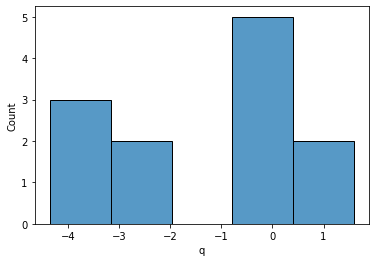

In [16]:
ax = model.posterior.plot()
model.q_distribution = ax

In [17]:
model